<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

In [26]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [27]:
X.shape , y.shape

((5000, 5), (5000,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.3)

In [29]:
X_train.shape , y_train.shape

((3500, 5), (3500,))

In [30]:
X_test.shape , y_test.shape

((1500, 5), (1500,))

In [31]:
X_test[0]

array([-0.77961874, -1.28605099, -0.09302676, -0.17881107, -0.79344472])

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [32]:
clf =  SVC(gamma=0.001,C=100)
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
clf.n_support_

array([318, 320], dtype=int32)

In [34]:
clf.intercept_

array([1.86466069])

In [35]:
def dec_func(X_i,dual_coef_,support_vectors_,intercept_):

  duel_coef = dual_coef_.reshape((-1,))
  ans = 0
  for i in range(len(support_vectors_)): #looping over all support vectors

    #support vectors are points from X_train through which pi+ and pi- pass through. 
    #duel_coef[i] -> alphai * y_i corresponding to support vector xi
    #np.exp(-0.001 * (np.linalg.norm(clf.support_vectors_[i]-X_i)**2)) -> computes rbf function
    
    norm = np.linalg.norm(support_vectors_[i]-X_i)
    sq = norm**2
    mul_gamma = -0.001 * sq
    rbf = np.exp(mul_gamma)
    mul_duel_coef = duel_coef[i]*rbf
    ans =  ans + mul_duel_coef

  return (ans + intercept_[0])

In [36]:
dec = []
dec_sklearn = []
for x_i in X_train[:5]:
  f = dec_func(x_i,clf.dual_coef_,clf.support_vectors_,clf.intercept_)
  dec.append(f)
  f = clf.decision_function(x_i.reshape(1,-1))[0]
  dec_sklearn.append(f)

In [37]:
dec #output from own coded decision function

[-3.908021882663461,
 -1.5508642333455633,
 -2.586241455107312,
 -2.1134864334215697,
 -3.880609789382503]

In [38]:
dec_sklearn #output from sk_learn's decision function

[-3.908021882663461,
 -1.5508642333455633,
 -2.586241455107312,
 -2.1134864334215697,
 -3.880609789382503]

In [39]:
dec == dec_sklearn

True

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [43]:
fcv = clf.decision_function(X_test)
y_pos_train = len(np.where(y_train == 1)[0])
y_neg_train = len(np.where(y_train == 0)[0])

y_plus = (y_pos_train+1)/(y_pos_train+2) # y+
y_minus = 1/(y_neg_train+2) # y-

In [44]:
y_cv_modified = y_test.copy()
y_cv_modified[y_cv_modified == 1] = y_plus
y_cv_modified[y_cv_modified == 0] = y_minus

In [18]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero

    w = np.zeros_like((dim))
    b = 0

    return w,b

In [19]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))
    return sig

In [20]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    n = len(y_true)
    sum = 0
    for i in range(len(y_true)):
      sum = sum + (y_true[i]*np.log10(y_pred[i]) + (1-y_true[i])*np.log10(1-y_pred[i]))

    loss = -1 * (1/n*sum)
    return loss

In [21]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    w = np.array(w)
    x = np.array(x)
    sig_term = np.dot(w,x) + b
    dw = x*(y - sigmoid(sig_term))-(alpha/N)*w
    return dw

In [22]:
 def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     w = np.array(w)
     x = np.array(x)
     sig_term = (np.dot(w,x) + b)
     db = y - sigmoid(sig_term)
     return (db)

In [49]:
grad_w,grad_b=initialize_weights(y_hat_test.shape)
w = grad_w
b = grad_b
N = len(y_hat_test)
eta0 = 0.0001
alpha = 0.0001
test_losses =[]
epochs = 10

for epoch in range(epochs):
  for i in range(len(y_hat_test)):
        w = w + eta0*(gradient_dw(fcv[i],y_cv_modified[i],w,b,alpha,1)) #training w on y_hat_test=decision_function(X_test), y_test
        b = b + eta0*(gradient_db(fcv[i],y_cv_modified[i],w,b))

  predicted_outputs = []
  for yis in fcv:
    prediction = sigmoid((np.dot(w,yis))+b)
    predicted_outputs.append(prediction)

  test_loss = logloss(y_test,predicted_outputs)
  test_losses.append(test_loss[0])

In [50]:
test_losses

[0.2617454620104133,
 0.23491157687430145,
 0.2161773018489007,
 0.2028027359751804,
 0.193077683621579,
 0.18591587076721444,
 0.18060831497223678,
 0.17667843368480987,
 0.17379654047687157,
 0.17172839313131838]

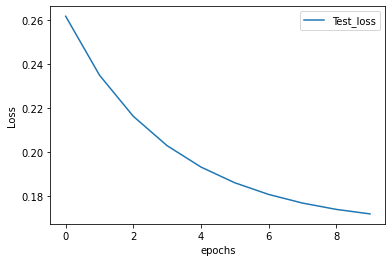

In [52]:
import matplotlib.pyplot as plt
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(range(epochs),test_losses,label="Test_loss")
plt.legend()

In [24]:
y_pred_calibrated = []
for y_i in y_hat_test:
  z = np.dot(w,y_i) + b #z = dotProduct of learned weight w and y_i = decision_function(X_test[i])
  opt = sigmoid(z)
  y_pred_calibrated.append(opt)